У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". Фокус цього ДЗ в тому, аби будувати візуалізації використовуючи методи pandas.DataFrame. Це дозволяє будувати візуалізації ще швидше.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot` та `pandas`.  Завантажте дані з файла yulu_rental.csv у pandas.DataFrame df.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('../data/yulu_rental.csv')

1.1. Користуючись групою методів `pandas.plot` побудуйте гістограму кількості зареєстрованих користувачів з налаштуваннями за замовченням (тобто без жодних додаткових параметрів).

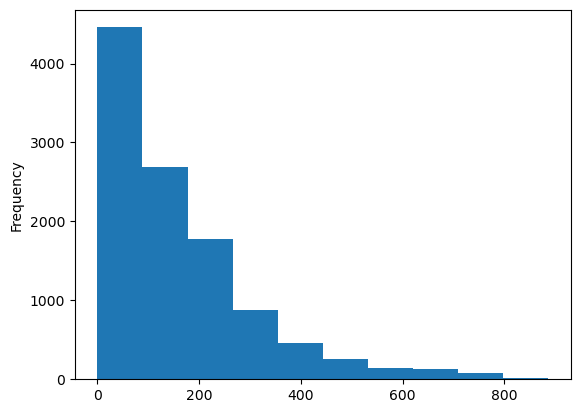

In [31]:
df['registered'].plot.hist();

1.2. Побудуйте гістограму для цього ж показника, але задайте кількість бінів рівну 30 і задайте прозорість 0.5. Додайте підписи за осями ОХ і ОУ, а також назву дівграмі. Опишіть свої спостереження. Що бачите? Чому дані можуть мати такий розподіл?

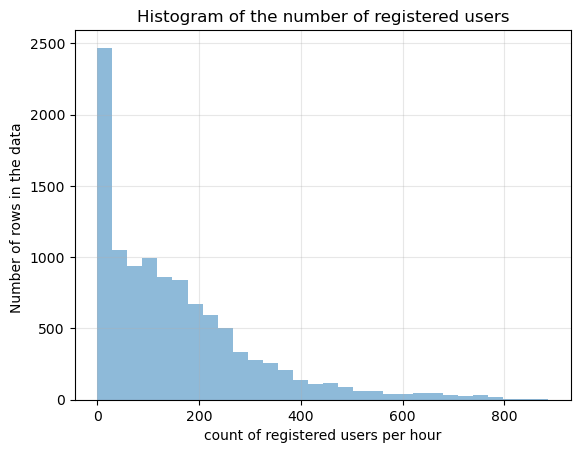

In [33]:
df['registered'].plot.hist(bins =30, alpha = .5)
plt.title('Histogram of the number of registered users') 
plt.xlabel('count of registered users per hour')
plt.ylabel('Number of rows in the data ')
plt.grid(alpha = .3);

Має вийти щось таке (може бути без сітки):

![](https://drive.google.com/uc?export=view&id=1Pb3UD8cmg_V0LLf8A4feOepTDXMqEAf8)


--------

Перетворимо колонку `datetime` на тип даних `pd.datetime` - це нам доопоможе в подальшій роботі. Просто запустіть колонку нижче і занатуйте собі цей метод роботи з колонкою, в якій міститься дата і час.

In [34]:
df['datetime'] = pd.to_datetime(df.datetime)

І створимо нову колонку `dayofweek` для того, аби дослідити детальніше, коли у нас немає поїздок.

In [35]:
df['dayofweek'] = df.datetime.dt.day_of_week

In [41]:
df['dayofweek'].unique()

array([5, 6, 0, 1, 2, 3, 4], dtype=int32)

Переглянемо значення в колонкці. Колонка dayofweek містить числа від 0 до 6 включно, де 0 відповідає понеділку.

In [36]:
df[['datetime','dayofweek']][df.dayofweek==0].head()

,datetime,dayofweek
47,2011-01-03 00:00:00,0
48,2011-01-03 01:00:00,0
49,2011-01-03 04:00:00,0
50,2011-01-03 05:00:00,0
51,2011-01-03 06:00:00,0


2. Проведемо аналіз нульової активності зареєстрованих користувачів за днями тижня. Для цього
  1. Виберіть з набору даних усі записи, де кількість зареєстрованих користувачів дорівнює 0. Групуйте ці записи за днями тижня (`dayofweek`) та обчисліть кількість нульових записів для кожного дня.
  2. Після групування, використайте графік типу "bar" для візуалізації результатів. Кожна смужка на графіку має відображати кількість записів у даних для цього дня тижня, коли не було зареєстровано жодної поїздки користувачами.

In [57]:
zero_filtred_users = df[df['registered'] == 0]
goup_by_dayofweek = zero_filtred_users.groupby('dayofweek')['registered'].size()
goup_by_dayofweek

dayofweek
0    5
1    3
2    2
3    1
4    1
5    1
6    2
Name: registered, dtype: int64

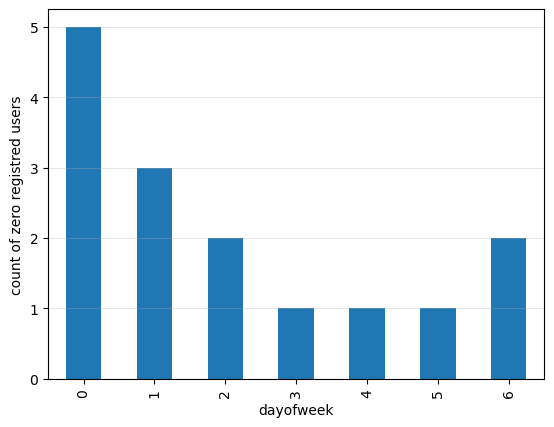

In [64]:
goup_by_dayofweek.plot.bar()
plt.grid(axis = 'y', alpha = .3)
plt.ylabel('count of zero registred users');

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1FXNzMa7rTdBQDwXSQfPTtPX5CHZK9A4X)

3. Проведемо аналіз загальної кількості зареєстрованих покристувачів за різними погодними умовами.
Згрупуйте всі дані за погодними умовами і визначте суму кількості зареєстрованих користувачів для кожної погодньої умови.
Побудуйте стовпачасту діаграму, які відобразить результат обчислень.
Зверніться до опису даних та дайте відповідь: чи побудована візуалізація має логічний сенс з точки зору опису даних.

In [67]:
weather_registred_dependence = df.groupby('weather')['registered'].sum()
weather_registred_dependence

weather
1    1186163
2     419914
3      87106
4        158
Name: registered, dtype: int64

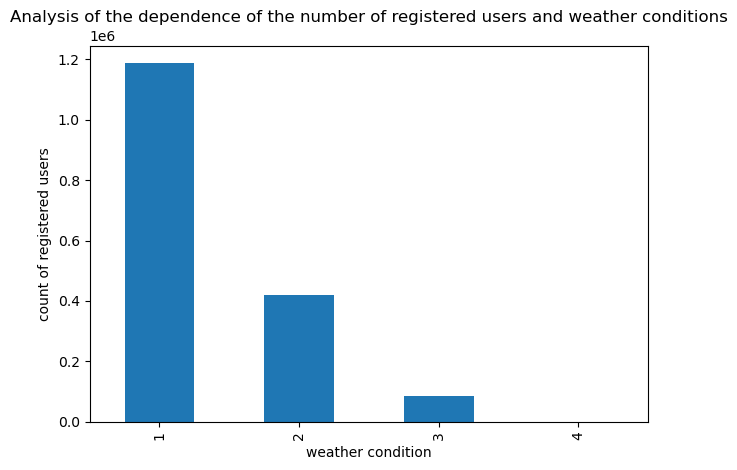

In [81]:
weather_registred_dependence.plot.bar()
plt.xlabel('weather condition')
plt.ylabel('count of registered users')
plt.title('Аnalysis of the dependence of the number of registered users and weather conditions')
plt.tight_layout();

Графік має сенс з точки зору описаних даних, але є декілька моментів:
- на осі Х зазначені категорії погодних умов цифрами. Якщо попередньо не мати значень цих категорій, то неможливо зрозуміти про що йде мова. Я би замінила цифри 1,2,3,4 на відповідні категорії на графіку. 
- на осі У шкала масштабована так, що в категорії 4- Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман виглядає що зареєстровані юзери відсутні, хоча в цій категорії 158 зареєстрованих користувачів. Тому тут треба погратися з масштабом, щоб всі дані відображались коректно. 

Стосовно самого графіку, то ми бачимо спадну тендецію реєстрації користувачів для використання електровелосипедів в залежності від погіршення погодних умов. 

4. Користуючись групою методів pandas.plot побудуйте діаграму розсіювання (scatter plot) між вологістю і кількістю зареєстрованих користувачів. Встановіть прозорість на 0.5, а також налаштуйте діаграму так, аби колір кожної точки відповідав значенню температури за відчуттями (`atemp`).

Проаналізуйте графік, що спостерігаєте?

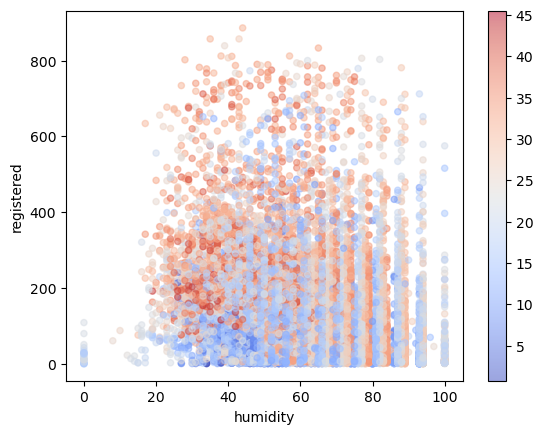

In [104]:
df.plot.scatter('humidity','registered', alpha =.5, c = df.atemp, cmap = 'coolwarm' )
plt.colorbar;

Найбільше скупчення точок відбувається в проміжку вологості 20-50 і від 0 до 600 зареєстрованих користувачів, що може свідчити про комфортну вологість для можливості користуватися електровелосипедом. Але залежності вологості та кількості зареєстрованих користувачів я не спостерігаю. Якщо звертати увагу на температуру яка відчувається, то можна побачити що при тепліших температурах більше зареєстрованих користувачів, що логічно для комфортної їзди на електровелосипедах. Але як бачимо, тепліші температури зустрічаються при будь-якій вологості, тому однозначного висновку по цьому графіку я не можу зробити.

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1trepX8z23YwyP9P8cAko9IzwOZkvLo8y)